In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# arousal = emotional intensity
# valence = positivity (higher is more positive)

files = [
    'arousal_cont_average.csv', # each row is a song and each column is the average arousal 15-45 seconds
    'arousal_cont_std.csv', #
    'songs_info.csv', # metadata = file, artist, title, genre
    'static_annotations.csv', # overall mean and std of arousal and valence # use as source of truth for each song
    'valence_cont_average.csv', # each row is a song and each column is the average valence 15-45 seconds
    'valence_cont_std.csv'
]

### Arousal Data:
---

In [6]:
df = pd.read_csv(f'data/annotations/{files[0]}')
print(df.info())
display(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   song_id         744 non-null    int64  
 1   sample_15000ms  744 non-null    float64
 2   sample_15500ms  744 non-null    float64
 3   sample_16000ms  744 non-null    float64
 4   sample_16500ms  744 non-null    float64
 5   sample_17000ms  744 non-null    float64
 6   sample_17500ms  744 non-null    float64
 7   sample_18000ms  744 non-null    float64
 8   sample_18500ms  744 non-null    float64
 9   sample_19000ms  744 non-null    float64
 10  sample_19500ms  744 non-null    float64
 11  sample_20000ms  744 non-null    float64
 12  sample_20500ms  744 non-null    float64
 13  sample_21000ms  744 non-null    float64
 14  sample_21500ms  744 non-null    float64
 15  sample_22000ms  744 non-null    float64
 16  sample_22500ms  744 non-null    float64
 17  sample_23000ms  744 non-null    flo

,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_40500ms,sample_41000ms,sample_41500ms,sample_42000ms,sample_42500ms,sample_43000ms,sample_43500ms,sample_44000ms,sample_44500ms,sample_45000ms
0,2,-0.109388,-0.114943,-0.116414,-0.118614,-0.126458,-0.133200,-0.136857,-0.144714,-0.138987,...,-0.259550,-0.262237,-0.261481,-0.264916,-0.265397,-0.265162,-0.264470,-0.265842,-0.267091,-0.266345
1,3,-0.110847,-0.123974,-0.131104,-0.135957,-0.140777,-0.144664,-0.163118,-0.165218,-0.158859,...,-0.265929,-0.263960,-0.263571,-0.262956,-0.260337,-0.248710,-0.245516,-0.251299,-0.254619,-0.259586
2,4,0.222328,0.179448,0.178389,0.184057,0.176043,0.178720,0.176345,0.175793,0.176155,...,0.298644,0.294144,0.302703,0.297487,0.303424,0.298097,0.304340,0.304115,0.305079,0.290705


### Valence Data
---

In [13]:
df = pd.read_csv(f'data/annotations/{files[4]}')
print(df.info())
display(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   song_id         744 non-null    int64  
 1   sample_15000ms  744 non-null    float64
 2   sample_15500ms  744 non-null    float64
 3   sample_16000ms  744 non-null    float64
 4   sample_16500ms  744 non-null    float64
 5   sample_17000ms  744 non-null    float64
 6   sample_17500ms  744 non-null    float64
 7   sample_18000ms  744 non-null    float64
 8   sample_18500ms  744 non-null    float64
 9   sample_19000ms  744 non-null    float64
 10  sample_19500ms  744 non-null    float64
 11  sample_20000ms  744 non-null    float64
 12  sample_20500ms  744 non-null    float64
 13  sample_21000ms  744 non-null    float64
 14  sample_21500ms  744 non-null    float64
 15  sample_22000ms  744 non-null    float64
 16  sample_22500ms  744 non-null    float64
 17  sample_23000ms  744 non-null    flo

,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_40500ms,sample_41000ms,sample_41500ms,sample_42000ms,sample_42500ms,sample_43000ms,sample_43500ms,sample_44000ms,sample_44500ms,sample_45000ms
0,2,-0.073341,-0.074662,-0.074078,-0.078155,-0.081589,-0.080875,-0.083612,-0.082146,-0.081633,...,-0.324848,-0.324682,-0.328113,-0.330134,-0.330135,-0.331165,-0.331769,-0.334287,-0.333847,-0.334209
1,3,-0.189701,-0.187763,-0.183738,-0.188760,-0.193703,-0.190832,-0.189039,-0.197552,-0.202871,...,-0.313982,-0.305432,-0.294849,-0.282939,-0.276366,-0.279426,-0.278661,-0.274246,-0.270161,-0.263900
2,4,0.154287,0.148063,0.146956,0.151180,0.135941,0.076832,0.084486,0.088514,0.090945,...,0.217566,0.218894,0.222273,0.190337,0.173085,0.174891,0.179883,0.182709,0.179331,0.178671


### Song Info / Metadata
---

In [2]:
df = pd.read_csv(f'data/annotations/{files[2]}')
for col in ['file_name', 'Artist', 'Song title', 'Genre', 'Mediaeval 2013 set']:
    df[col] = df[col].str.replace(r'\t', '', regex=True)
print(df.info())
display(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   song_id                         744 non-null    int64  
 1   file_name                       744 non-null    object 
 2   Artist                          744 non-null    object 
 3   Song title                      744 non-null    object 
 4   start of the segment (min.sec)  744 non-null    float64
 5   end of the segment (min.sec)    744 non-null    float64
 6   Genre                           744 non-null    object 
 7   Mediaeval 2013 set              744 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 46.6+ KB
None


,song_id,file_name,Artist,Song title,start of the segment (min.sec),end of the segment (min.sec),Genre,Mediaeval 2013 set
0,2,2.mp3,The New Mystikal Troubadours,Tonight A Lonely Century,0.48,1.33,Blues,development
1,3,3.mp3,Kevin MacLeod,DD Groove,0.36,1.21,Blues,evaluation
2,4,4.mp3,Kevin MacLeod,Slow Burn,1.29,2.14,Blues,development


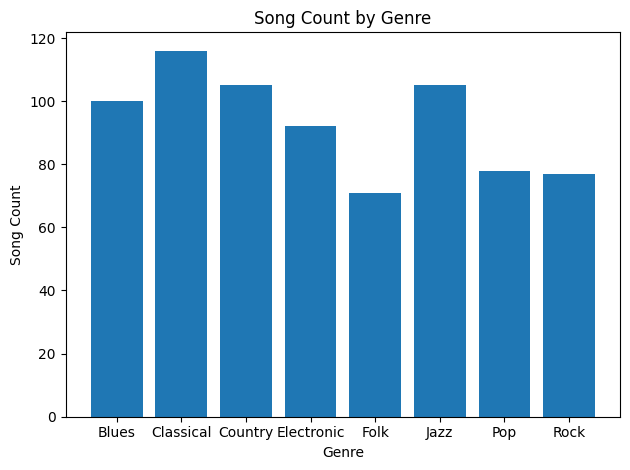

In [20]:
grp = df.groupby('Genre')['song_id'].count().reset_index()
grp.columns = ['genre', 'count']
grp
plt.bar(grp.genre, grp['count'])
plt.title('Song Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Song Count')
plt.tight_layout()

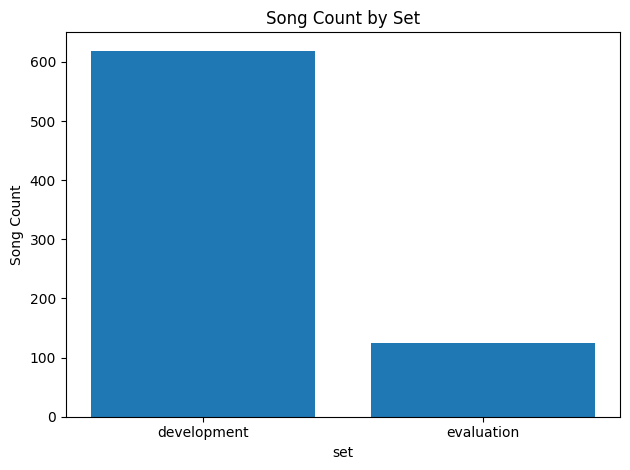

In [29]:
grp = df.groupby('Mediaeval 2013 set')['song_id'].count().reset_index()
grp.columns = ['set', 'count']

plt.bar(grp['set'], grp['count'])
plt.title('Song Count by Set')
plt.xlabel('set')
plt.ylabel('Song Count')
plt.tight_layout()

### Annotations:
---

,song_id,mean_arousal,std_arousal,mean_valence,std_valence
0,2,3.1,0.99443,3.0,0.66667
1,3,3.5,1.84090,3.3,1.70290
2,4,5.7,1.49440,5.5,1.71590


--distributions--


,song_id,mean_arousal,std_arousal,mean_valence,std_valence
count,744.000000,744.000000,744.000000,744.000000,744.000000
mean,472.801075,4.786459,1.646668,5.006063,1.564322
std,286.930192,1.376034,0.422581,1.245554,0.415570
min,2.000000,1.600000,0.632460,1.600000,0.483050
25%,218.750000,3.700000,1.364875,4.100000,1.264900
50%,450.500000,4.800000,1.649900,5.000000,1.595100
75%,718.250000,5.900000,1.932200,5.900000,1.840900
max,1000.000000,8.400000,2.846000,8.100000,2.668700


<AxesSubplot: >

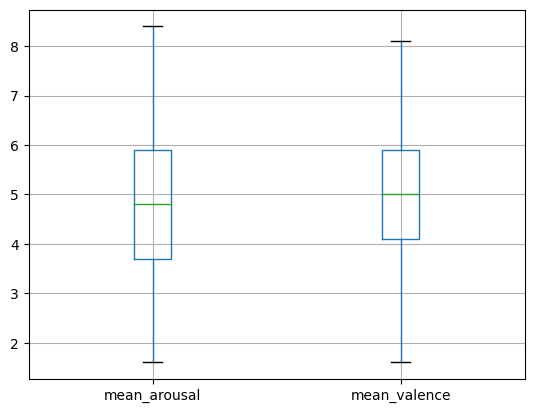

In [36]:
df = pd.read_csv(f'data/annotations/{files[3]}')
#print(df.info())
display(df.head(3))
print('--distributions--')
display(df.describe())
df[['mean_arousal', 'mean_valence']].boxplot()

## Extra Functions to create static data
---

In [3]:
def remove_missing_mp3():
    ls = list(range(1, 1001))
    song_truth = pd.read_csv(f'data/annotations/{files[3]}')
    exclude = set(ls) ^ set(song_truth['song_id'])

    for n in exclude:
        file = f"data/clips_45seconds/{n}.mp3"
        if os.path.exists(file):
            os.remove(file)

#remove_missing_mp3()

In [4]:
# TODO: convert mp3 to wav using pydub package
# REQUIRES FFMPEG

def wav_conversion():
    from pydub import AudioSegment
    song_truth = pd.read_csv(f'data/annotations/{files[3]}')

    for n in song_truth['song_id']:
        file = f"data/clips_45seconds/{n}.mp3"
        wav_output = f"data/wav45/{n}.wav"
        audio = AudioSegment.from_mp3(file)
        audio.export(wav_output, format="wav")

In [5]:
from audiologic.utils import transcribe_audio
import whisper

def lyricize():
    song_truth = pd.read_csv(f'data/annotations/{files[3]}')
    model = whisper.load_model('base')

    lyric_dict = {'song_id':[], 'lyrics':[]}
    for n in song_truth['song_id']:
        file = f"data/clips_45seconds/{n}.mp3"
        txt = transcribe_audio(file, preloaded_model=model)
        lyric_dict['song_id'].append(n)
        lyric_dict['lyrics'].append(txt.text)
    
    df = pd.DataFrame(lyric_dict)

    return df

#df_lyric = lyricize()
#df_lyric.to_csv('data/lyrics.csv')
#df_lyric.head()

/Users/Ty/Code/Practicum/audiologic/env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
